In [1]:
import os
import collections
import pandas as pd
import classes_vgg16 as classes
import torchsummary

import torch
from torch import nn
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

#import torch.utils.model_zoo # required to load nets
#import torchvision.transforms.functional as TF
#import torchvision.models

#%load_ext autoreload
#%autoreload 2

In [ ]:
# Replicate analysis for VGG16_places365 to check if feature retrieval is correct

In [2]:
"""
To check that the implementation of the code is correct, the analysis of vgg16_playes net is repeated here,
which should reproduce the same results as in the matlab implementation.

The boilerplate code for this is a bit different, since the vgg16_places model is imported from a different source
and in a different format than the Taskonomy models.

As soon as the model is brought into the right format, the analysis steps are the same in principle.
"""

'\nTo check that the implementation of the code is correct, the analysis of vgg16_playes net is repeated here,\nwhich should reproduce the same results as in the matlab implementation.\n\nThe boilerplate code for this is a bit different, since the vgg16_places model is imported from a different source\nand in a different format than the Taskonomy models.\n\nAs soon as the model is brought into the right format, the analysis steps are the same in principle.\n'

# Prepare activation extraction

## Import parameters into replicated architecture

In [2]:
vgg16_places = nn.Sequential(
    collections.OrderedDict(
        [
            ('conv1_1', nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)),
            ('ReLU1_1', nn.ReLU()),
            ('conv1_2', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)),
            ('ReLU1_2',nn.ReLU()),
            ('MaxPool1', nn.MaxPool2d(kernel_size=2, stride=2,padding=0)),
            ('conv2_1',nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)),
            ('ReLU2_1',nn.ReLU()),
            ('conv2_2',nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)),
            ('ReLU2_2',nn.ReLU()),
            ('MaxPool2', nn.MaxPool2d(kernel_size=2, stride=2,padding=0)),
            ('conv3_1', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)),
            ('ReLU3_1',nn.ReLU()),
            ('conv3_2', nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)),
            ('ReLU3_2',nn.ReLU()),
            ('conv3_3', nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)),
            ('ReLU3_3',nn.ReLU()),
            ('MaxPool3', nn.MaxPool2d(kernel_size=2, stride=2,padding=0)),
            ('conv4_1', nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ('ReLU4_1',nn.ReLU()),
            ('conv4_2', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ('ReLU4_2',nn.ReLU()),
            ('conv4_3', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ('ReLU4_3',nn.ReLU()),
            ('MaxPool4', nn.MaxPool2d(kernel_size=2, stride=2,padding=0)),
            ('conv5_1', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ('ReLU5_1',nn.ReLU()),
            ('conv5_2', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ('ReLU5_2',nn.ReLU()),
            ('conv5_3', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ('ReLU5_3',nn.ReLU()),
            ('MaxPool5', nn.MaxPool2d(kernel_size=2, stride=2,padding=0)),
            ('Flatten6', nn.Flatten()),
            ('fc6', nn.Linear(in_features=25088, out_features=4096)),
            ('ReLU6',nn.ReLU()),
            ('fc7', nn.Linear(in_features=4096, out_features=4096)),
            ('ReLU7',nn.ReLU()),
            ('fc8a', nn.Linear(in_features=4096, out_features=365)),
            ('Softmax8a', nn.Softmax(dim=-1))
        ]
    )
)

In [3]:
vgg16_places_statedict = torch.load('vgg16_places365.caffemodel.pt')
vgg16_places.load_state_dict(vgg16_places_statedict)

<All keys matched successfully>

## Build feature(activations) extractor

In [4]:
_, eval_nodes = get_graph_node_names(vgg16_places)
#for node in eval_nodes:
#    print(node, end='   ')

return_nodes = { node:node for node in eval_nodes if "conv" in node or 'fc' in node}

vgg16_places_fe = create_feature_extractor(vgg16_places, return_nodes=return_nodes)

In [6]:
torchsummary.summary(vgg16_places_fe, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

# Extract activations

In [5]:
DATASET_NAMES = ('places1', 'places2', 'oasis')

SCALE_NAMES = ('scale2','scale4','scale8','scale16','scale32')

In [6]:
MODEL_NAME = 'vgg16' # placeholder for different taskonomy models later
DATA_PATH = './data_224x224'
BEHAVIOR_PATH = './behavior'
RESULTS_PATH = './results_vgg16'

In [8]:
# create folder structure for image
for dataset_name in DATASET_NAMES:
    for scale_name in SCALE_NAMES:
        for version_name in ('full','version1','version2'):
            os.makedirs(os.path.join(DATA_PATH, dataset_name, scale_name, version_name))

## Perform Analysis only for Places1


In [9]:
for dataset_name in DATASET_NAMES:
    for scale_name in SCALE_NAMES:
        
        dataset = classes.ImageDataset(
            os.path.join(DATA_PATH, dataset_name, scale_name))
                
        correlations = classes.calculate_dataset_correlation(dataset, vgg16_places_fe)
        correlations.to_csv(os.path.join(RESULTS_PATH, MODEL_NAME, dataset_name, scale_name, 'correlations.csv'), index=False, header=False)


        selfsimilarity = classes.calculate_dataset_self_similarity(dataset, vgg16_places_fe)
        selfsimilarity.to_csv(os.path.join(RESULTS_PATH, MODEL_NAME, dataset_name, scale_name, 'selfsimilarity.csv'), index=False, header=False)

        l2norm = classes.calculate_dataset_l2norm(dataset, vgg16_places_fe)
        l2norm.to_csv(os.path.join(RESULTS_PATH, MODEL_NAME, dataset_name, scale_name, 'l2norm.csv'), index=False, header=False)

# Testing

In [ ]:
results_path = os.path.join(RESULTS_PATH, DATASET_NAMES[0], SCALE_NAMES[0])

In [26]:
places_images = classes.ImageDataset('./data_224x224/places1/scale4', beauty_ratings_path='./behavior/ratings_study1.csv')

In [27]:
correlations = classes.calculate_dataset_correlation(places_images, vgg16_places_fe)

In [41]:
correlations.to_csv(os.path.join(results_path, 'correlations.csv'))


In [42]:
correlations = pd.read_csv(os.path.join(results_path, 'correlations.csv'), index_col=0)

## Correlate integration and beauty

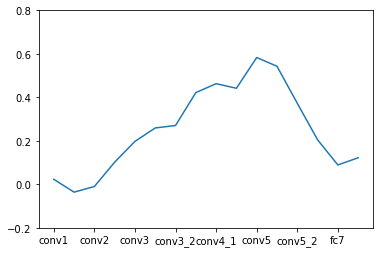

In [43]:
classes.correlate_integration_beauty(correlations, places_images.beauty_ratings).plot(ylim=(-.2,.8))

In [30]:
correlations.shape

(250, 16)